# Projet Analyse de réseaux 

Je pense que y'a pas assez de petites entreprises. ce dataset se concentre uniquement sur les achats faientt pas les enormes entreprises. On a pas de moyennes entreprises qui achètent des petites? est une réalité ou le dataset qui les exclus ?

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ac = pd.read_csv("Acquisitions.csv")
ac.head()

,Acquisitions ID,Acquired Company,Acquiring Company,Year of acquisition announcement,Deal announced on,Price,Status,Terms,Acquisition Profile,News,News Link
0,[24]7 acquired Tellme in 2012,Tellme,[24]7,2012,1/02/2012,Undisclosed amount,Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/a9e7a5ac...,Microsoft and 24/7 Inc. Join Forces to Deliver...,http://www.microsoft.com/en-us/news/press/2012...
1,3Com acquired Palm in 1997,Palm,3Com,1997,1/06/1997,Undisclosed amount,Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/65869a9a...,Investors bless 3Com-USR merger - CNET News,http://news.cnet.com/Investors-bless-3Com-USR-...
2,Adobe Systems acquired Accelio Corporation in ...,Accelio Corporation,Adobe,2002,15/04/2002,Undisclosed amount,Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/ba5294ea...,Adobe Systems acquired Accelio Corporation,http://www.alacrastore.com/storecontent/Thomso...
3,Adobe Systems acquired Aldus Corp in 1994,Aldus Corp,Adobe,1994,31/08/1994,Undisclosed amount,Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/e9ddca86...,Adobe Systems acquired Aldus Corp,http://www.alacrastore.com/storecontent/Thomso...
4,Adobe Systems acquired Amicima in 2006,Amicima,Adobe,2006,28/06/1905,Undisclosed amount,Undisclosed,Undisclosed,http://www.crunchbase.com/acquisition/97db67f9...,NaN,NaN


In [73]:
x= pd.read_csv("Acquired Tech Companies.csv")
x.head()

y=pd.read_csv("Acquiring Tech Companies.csv")
y.head()

,Acquiring Company,CrunchBase Profile,Image,Tagline,Market Categories,Year Founded,IPO,Founders,Number of Employees,Number of Employees (year of last update),...,Address (HQ),City (HQ),State / Region (HQ),Country (HQ),Description,Homepage,Twitter,Acquired Companies,Acquisitions ID,API
0,Adobe,www.crunchbase.com/organization/adobe-systems,http://a2.images.crunchbase.com/image/upload/c...,Adobe is an American multinational computer so...,"Photo Editing, Design, Creative, Software, Ima...",1982,1986,"John Warnock, Charles Geschke","11,144",2012.0,...,"San Jose, California, United States",San Jose,California,United States,Adobe Systems is an American multinational com...,http://www.adobe.com,http://twitter.com/Adobe,"Accelio Corporation, Aldus Corp, Amicima, Ares...",Adobe Systems acquired Accelio Corporation in ...,http://api.crunchbase.com/v/2/organization/ado...
1,Amazon,www.crunchbase.com/organization/amazon,http://a4.images.crunchbase.com/image/upload/c...,Amazon is an international e-commerce company ...,"Groceries, Consumer Goods, Crowdsourcing, E-Co...",1994,1997,Jeff Bezos,"132,600",2014.0,...,"1200 12th Ave, Seattle, WA 98144, USA",Seattle,Washington,United States,Amazon.com is an American international e-comm...,http://amazon.com,http://twitter.com/amazon,"AbeBooks, Accept.Com, Alexa, Amie Street, Audi...","Amazon acquired AbeBooks in 2008, Amazon acqui...",http://api.crunchbase.com/v/2/organization/ama...
2,AOL,www.crunchbase.com/organization/aol,http://a5.images.crunchbase.com/image/upload/c...,AOL is a Brand company committed to innovating...,"News, Advertising Platforms, Content Creators,...",1985,2009,"Marc Seriff, Steve Case, Jim Kimsey","5,600",2012.0,...,"770 Broadway, New York City, New York, United ...",New York City,New York,United States,AOL is a global advertising-supported Web comp...,http://www.aol.com,http://twitter.com/aol,"5min Media, Adap.tv, ADTECH, Advertising.com, ...","AOL acquired 5min Media in 2010, AOL acquired ...",http://api.crunchbase.com/v/2/organization/aol...
3,Apple,www.crunchbase.com/organization/apple,http://a4.images.crunchbase.com/image/upload/c...,Apple is a multinational corporation that desi...,"Computers, Consumer Electronics, Hardware + So...",1976,1980,"Steve Jobs, Ronald Wayne, Steve Wozniak","98,000",2014.0,...,"1 Infinite Loop, Cupertino, California, United...",Cupertino,California,United States,Apple is an American multinational corporation...,http://www.apple.com,NaN,"AlgoTrim, Anobit Technologies, AuthenTec, Beat...","Apple acquired AlgoTrim in 2013, Apple acquire...",http://api.crunchbase.com/v/2/organization/app...
4,AT&T,www.crunchbase.com/organization/at-t,http://a4.images.crunchbase.com/image/upload/c...,AT&T provides telecommunications services such...,Mobile,2000,1983,Alexander Graham Bell,"246,740",2013.0,...,"208 S. Akard St, Dallas, Texas, United States",Dallas,Texas,United States,AT&T Inc. AT&T is a holding company. AT&T is a...,http://www.att.com,http://twitter.com/ATT,"Centennial Communications Corp, Dobson Communi...",AT&T acquired Centennial Communications Corp i...,http://api.crunchbase.com/v/2/organization/at-...


## Nettoyage rapide

In [47]:
# nettoyage du prix 

ac['Price'] = ac['Price'].replace("Undisclosed amount", np.nan)

def remove_sign(x):
    if x is not np.nan:
        x = x.split("$")[1]
    return x
    
def remove_comma(x):
    if x is not np.nan:
        x = str(x).replace(",","")
    return x
    
def to_integer(x):
    if x is not np.nan:
        x = int(x)
    return x 

ac.Price = ac.Price.apply(lambda x: to_integer(remove_comma(remove_sign(x))))

In [67]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Acquisitions ID                   1643 non-null   object 
 1   Acquired Company                  1643 non-null   object 
 2   Acquiring Company                 1643 non-null   object 
 3   Year of acquisition announcement  1643 non-null   int64  
 4   Deal announced on                 1643 non-null   object 
 5   Price                             421 non-null    float64
 6   Status                            1642 non-null   object 
 7   Terms                             1643 non-null   object 
 8   Acquisition Profile               1642 non-null   object 
 9   News                              1552 non-null   object 
 10  News Link                         1552 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 141.3+ KB


## Visualisation

In [83]:
ac.describe()

,Year of acquisition announcement,Price
count,1643.000000,4.210000e+02
mean,2007.435788,1.099834e+09
std,6.380064,3.342615e+09
min,1984.000000,1.000000e+06
25%,2005.000000,6.000000e+07
50%,2008.000000,1.800000e+08
75%,2012.000000,6.250000e+08
max,2104.000000,4.500000e+10


In [80]:
# Acheteur
ac["Acquiring Company"].value_counts()

Acquiring Company
Cisco Systems             162
Google                    161
Microsoft                 136
IBM                       121
Yahoo                     112
                         ... 
Gores Technology Group      1
Hellman & Friedman          1
Lenovo                      1
3Com                        1
[24]7                       1
Name: count, Length: 65, dtype: int64

In [79]:
# Prix d'achat 
print(ac.Price.mean())
print(ac.Price.median())

1099834441.8052256
180000000.0


In [81]:
# Pays de l'acheteur
x["Country (HQ)"].value_counts()

Country (HQ)
United States              914
Canada                      48
Great Britain               43
Israel                      27
Germany                     19
Japan                       15
Sweden                      13
France                       7
The Netherlands              7
Finland                      7
Spain                        5
Australia                    5
Ireland                      5
Denmark                      4
Switzerland                  4
Singapore                    3
India                        3
Italy                        2
Hong Kong                    2
New Zealand                  2
Norway                       2
Turkey                       2
China                        2
Belgium                      2
Czech Republic               1
Romania                      1
Korea                        1
Russia                       1
Portugal                     1
United Stats of AMerica      1
Ghana                        1
Greece                    

In [82]:
#Secteur d'activité - logique c'est tous des softwares vu que c'est la tech
x["Market Categories"].value_counts()

Market Categories
Software                                                                                 211
Curated Web                                                                               98
Enterprise Software                                                                       56
Mobile                                                                                    49
Security                                                                                  29
                                                                                        ... 
Web Hosting, Flash Storage                                                                 1
Security, Identity Management, Open Source, Software                                       1
Big Data, Business Intelligence, Collaboration, Analytics, Software, Video, Databases      1
Mobile Payments, Payments, Mobile                                                          1
Collaboration, Productivity Software, Web Developmen

<Axes: >

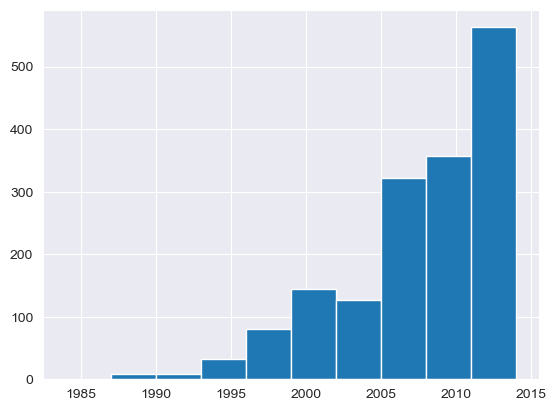

In [97]:
ac[ac["Year of acquisition announcement"]== 2104.0] =2014
ac["Year of acquisition announcement"].hist()

In [6]:
communs = list(set(ac['Acquired Company']) & set( ac['Acquiring Company']))
print(communs)


['3Com', 'Terremark Worldwide', 'StumbleUpon', 'PayPal', 'Amie Street', 'StubHub']
